In [36]:
import pandas as pd

# Load the dataset
file_path = 'weather.csv' 
weather_data = pd.read_csv(file_path)

# Convert 'dt_iso' column to datetime format with a specified format

weather_data['dt_iso'] = weather_data['dt_iso'].str.replace(' +0000 UTC', '', regex=False)
weather_data['dt_iso'] = pd.to_datetime(weather_data['dt_iso'], errors='coerce')

# Select only the necessary columns for forecasting
forecasting_features = weather_data[[
    "dt_iso", "temp", "visibility", "dew_point", "feels_like", 
    "pressure", "humidity", "wind_speed", "wind_deg", 
    "rain_1h",'rain_3h', "clouds_all"
]]

# Filter out data for the year 2024
forecasting_features = forecasting_features[forecasting_features['dt_iso'].dt.year != 2024]

# Reset the index
forecasting_features.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
output_path = 'filtered_weather_data.csv'  # Specify where to save the new file
forecasting_features.to_csv(output_path, index=False)

print("Data cleaning complete. File saved as 'filtered_weather_data.csv'.")



Data cleaning complete. File saved as 'filtered_weather_data.csv'.


In [2]:
# weather_data

In [4]:
import pandas as pd

# Load the dataset to perform Exploratory Data Analysis (EDA)
file_path = 'filtered_weather_data.csv'
weather_data = pd.read_csv(file_path)

# Display the first few rows and summary information to understand the structure of the data
weather_data.head(), weather_data.info()

# Display the statistical summary for all columns
weather_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217442 entries, 0 to 217441
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      217442 non-null  object 
 1   temp        217442 non-null  float64
 2   visibility  205466 non-null  float64
 3   dew_point   217442 non-null  float64
 4   feels_like  217442 non-null  float64
 5   pressure    217442 non-null  int64  
 6   humidity    217442 non-null  int64  
 7   wind_speed  217442 non-null  float64
 8   wind_deg    217442 non-null  int64  
 9   rain_1h     76279 non-null   float64
 10  rain_3h     0 non-null       float64
 11  clouds_all  217442 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 19.9+ MB


,dt_iso,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds_all
count,217442,217442.000000,205466.000000,217442.000000,217442.000000,217442.000000,217442.000000,217442.000000,217442.000000,76279.000000,0.0,217442.000000
unique,210384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-05-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.913694,8239.651534,21.768624,27.828070,1011.123458,79.183971,2.179560,141.893544,1.090745,NaN,53.215391
std,NaN,3.351451,2242.543300,2.898615,4.895322,5.185508,13.076059,1.756719,123.829551,1.646499,NaN,25.465189
min,NaN,15.530000,100.000000,5.890000,15.340000,987.000000,24.000000,0.000000,0.000000,0.100000,NaN,0.000000
25%,NaN,23.470000,7000.000000,20.070000,24.090000,1007.000000,70.000000,1.000000,10.000000,0.220000,NaN,39.000000
50%,NaN,26.030000,9999.000000,22.140000,26.400000,1011.000000,83.000000,1.540000,120.000000,0.490000,NaN,43.000000
75%,NaN,28.250000,10000.000000,23.920000,32.070000,1015.000000,88.000000,3.090000,233.000000,1.230000,NaN,75.000000


In [ ]:
"""Here's the statistical summary for all columns in the dataset:

- **Temperature (temp)**: 
  - Mean: 25.91°C
  - Range: 15.53°C to 36.39°C
  
- **Visibility**:
  - Mean: 8239.65 meters
  - Range: 100 to 10,000 meters

- **Dew Point**:
  - Mean: 21.77°C
  - Range: 5.89°C to 29.97°C

- **Feels Like Temperature (feels_like)**:
  - Mean: 27.83°C
  - Range: 15.34°C to 43.35°C

- **Pressure**:
  - Mean: 1011.12 hPa
  - Range: 987 to 1032 hPa

- **Humidity**:
  - Mean: 79.18%
  - Range: 24% to 100%

- **Wind Speed**:
  - Mean: 2.18 m/s
  - Range: 0 to 27.3 m/s

- **Wind Direction (wind_deg)**:
  - Mean: 141.89° (indicative of predominant wind direction)
  - Range: 0° to 360°

- **Rainfall in 1 Hour (rain_1h)**:
  - Mean (only non-missing values): 1.09 mm
  - Range: 0.1 mm to 38.44 mm

- **Cloud Cover (clouds_all)**:
  - Mean: 53.22%
  - Range: 0% to 100%

The `rain_3h` column has no values and can likely be dropped. If you need further analysis, such as correlations, missing data handling, or visualizations, please let me know!"""

<Figure size 1400x800 with 0 Axes>

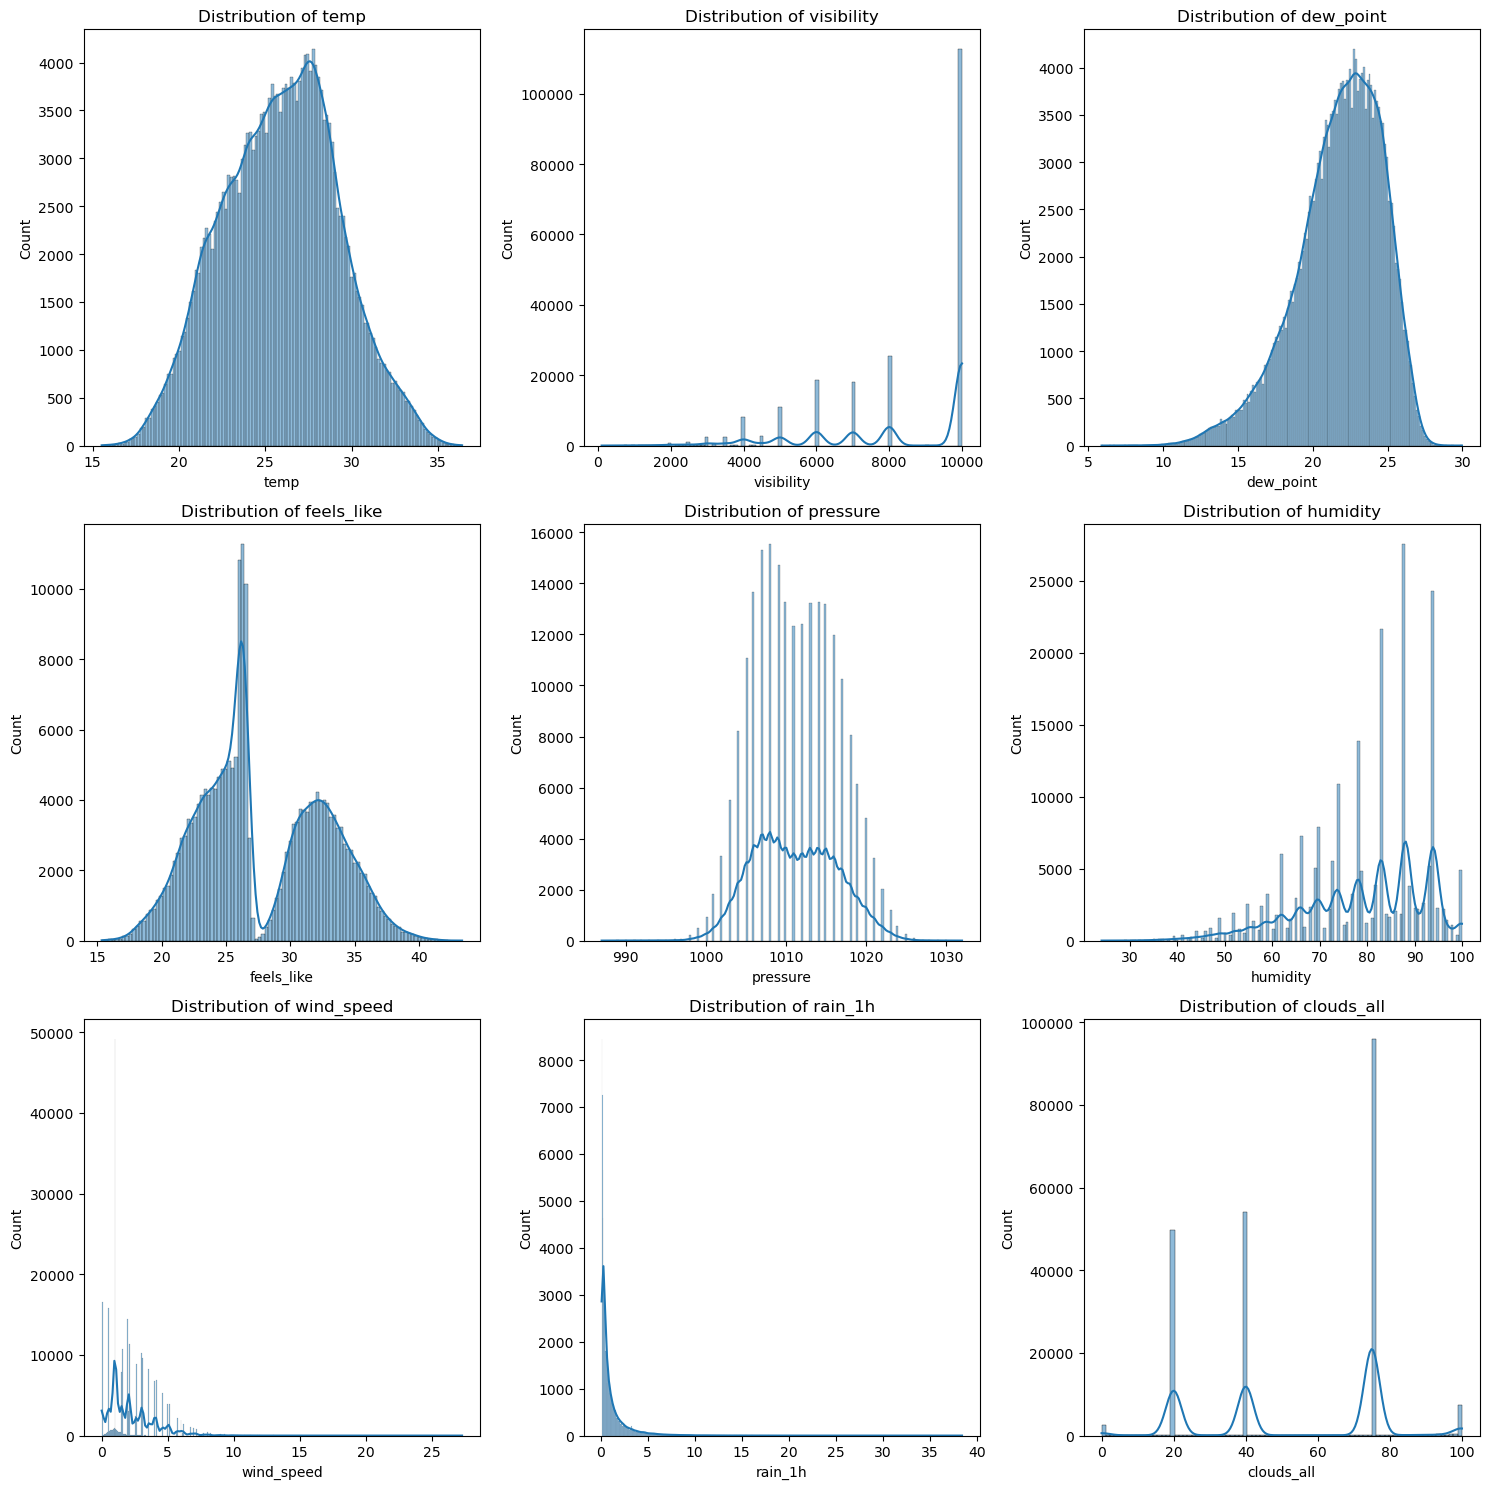

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
plt.figure(figsize=(14, 8))

# Histograms for continuous features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
continuous_features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all']
for i, feature in enumerate(continuous_features):
    sns.histplot(weather_data[feature].dropna(), kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {feature}')

fig.tight_layout()





In [ ]:
"""". Histogram (Distribution) Plots for Each Feature
temp: Temperature distribution is approximately normal, with most temperatures ranging from 20 to 30°C.
visibility: Visibility distribution shows many values at the maximum (10,000), likely due to many days with good visibility.
dew_point: Dew point distribution is close to normal, reflecting typical humidity conditions.
feels_like: Bimodal distribution, indicating that feels-like temperature can vary significantly over time or weather conditions.
pressure: Pressure distribution is approximately normal, with most values concentrated between 1010-1020 hPa.
humidity: Humidity distribution is uneven, with many values at 100%, reflecting high humidity conditions on many days.
wind_speed: Wind speed is usually low, with most values below 5 m/s.
rain_1h: Rainfall is concentrated at low levels, indicating dry conditions on many days.
clouds_all: Cloud cover distribution shows many days with scattered clouds or clear skies."""

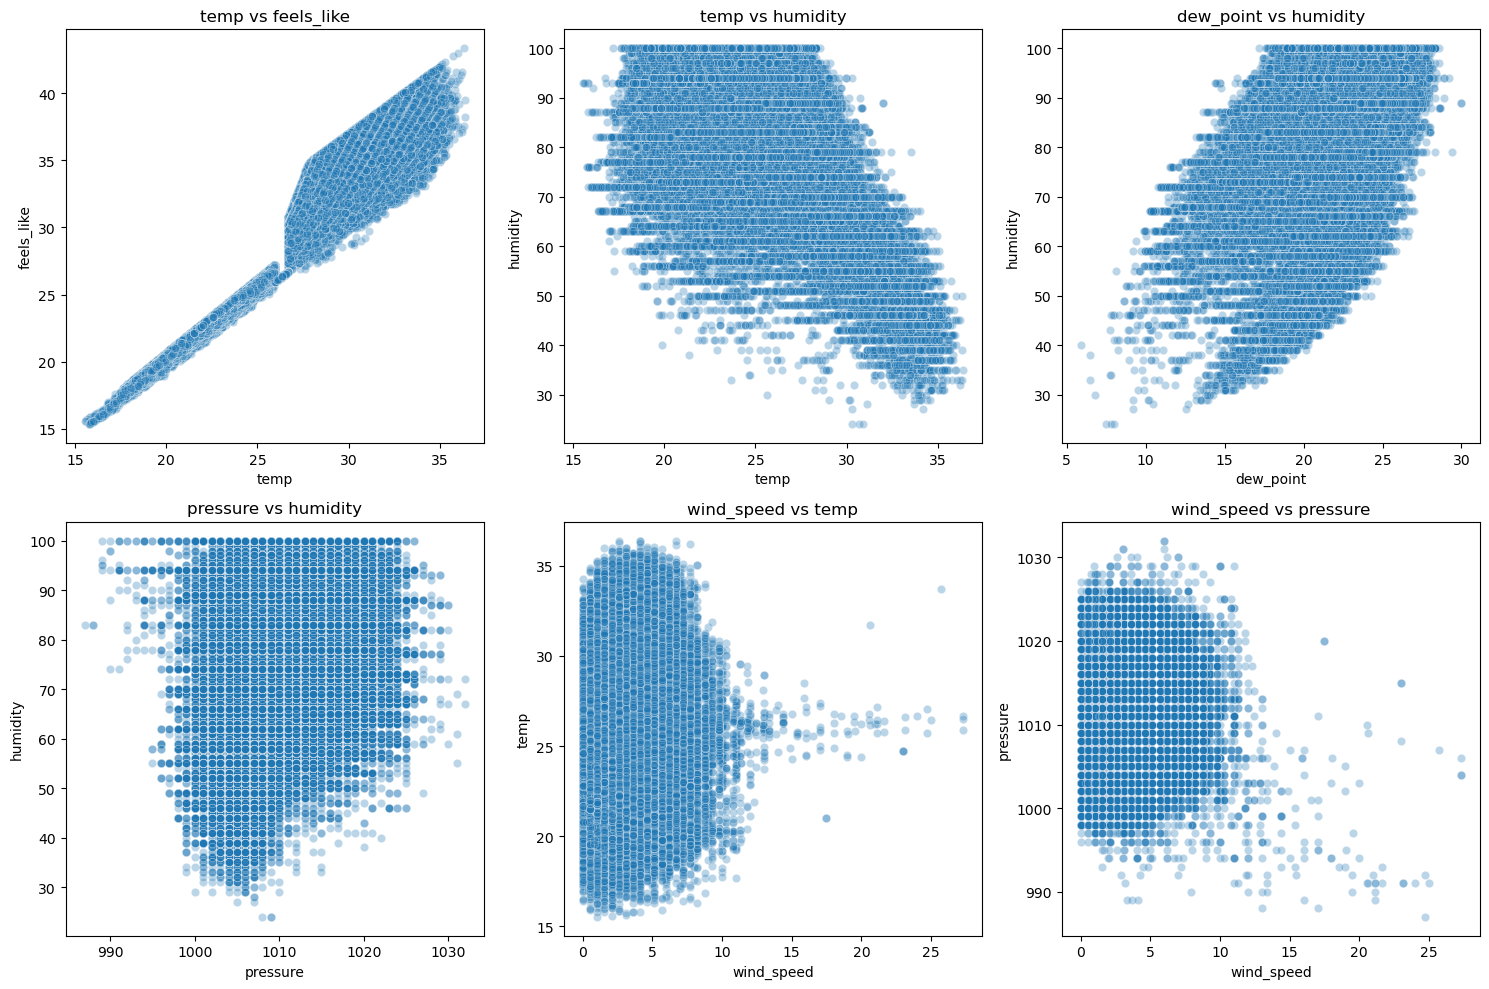

In [41]:
# Scatter Plots for selected pairs to explore relationships
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
scatter_pairs = [('temp', 'feels_like'), ('temp', 'humidity'), ('dew_point', 'humidity'),
                 ('pressure', 'humidity'), ('wind_speed', 'temp'), ('wind_speed', 'pressure')]

for i, (x, y) in enumerate(scatter_pairs):
    sns.scatterplot(data=weather_data, x=x, y=y, alpha=0.3, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{x} vs {y}')

fig.tight_layout()

In [ ]:
"""Scatter Plots between Feature Pairs
temp vs feels_like: There is an almost linear relationship between temperature and feels-like temperature, showing that feels-like temperature usually increases as the actual temperature rises. This strong correlation indicates that feels-like temperature depends significantly on the actual temperature.
temp vs humidity: As temperature increases, humidity tends to decrease, which is common in hot, dry climates. This shows an inverse relationship between temperature and humidity.
dew_point vs humidity: There is a positive relationship between humidity and dew point, where higher humidity correlates with a higher dew point. This makes sense because a high dew point typically accompanies high humidity.
pressure vs humidity: There is no clear relationship between pressure and humidity, indicating relative independence between these two factors in the data.
wind_speed vs temp: Wind speed can be high at any temperature, but there is no clear relationship between wind speed and temperature.
wind_speed vs pressure: Wind speed tends to be higher at lower pressure levels, which is commonly observed in adverse weather conditions, such as storms or low-pressure systems."""

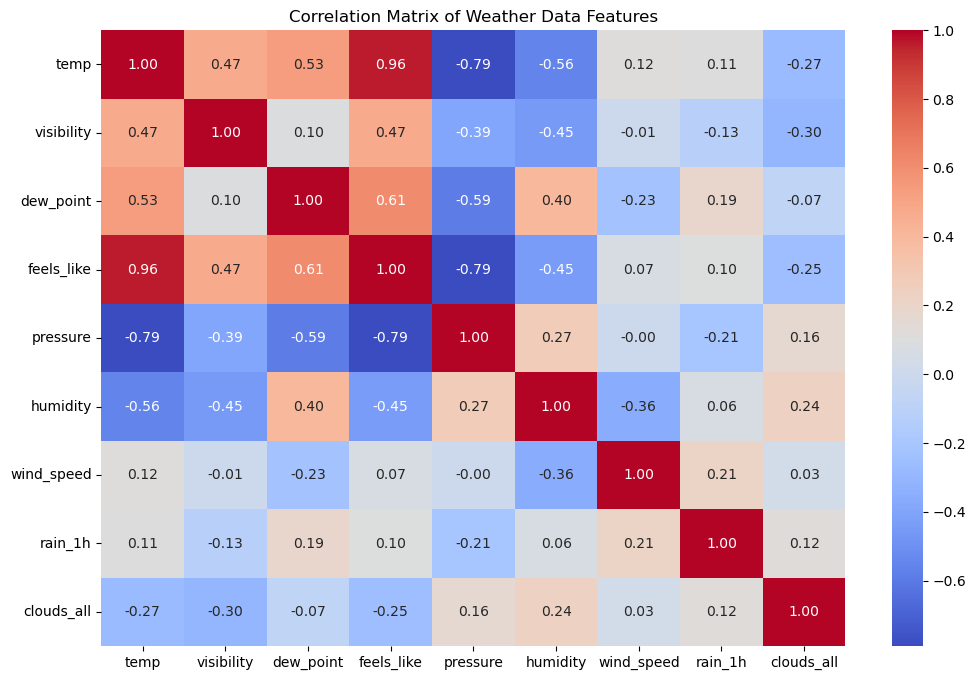

In [42]:
# Correlation Plot to show correlation between features
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Data Features')

plt.show()


In [ ]:
"""Correlation Matrix
temp and feels_like: Very high correlation (0.96), confirming a strong link between temperature and feels-like temperature.
humidity and dew_point: Moderate correlation (0.40), indicating that as humidity rises, dew point also tends to increase.
temp and pressure: Negative correlation (-0.79), showing that as temperature rises, pressure tends to decrease.
humidity and pressure: Weak negative relationship (-0.45), indicating that pressure may slightly decrease as humidity rises.
Other features like wind_speed, rain_1h, and clouds_all do not show strong correlations with each other or with other features."""

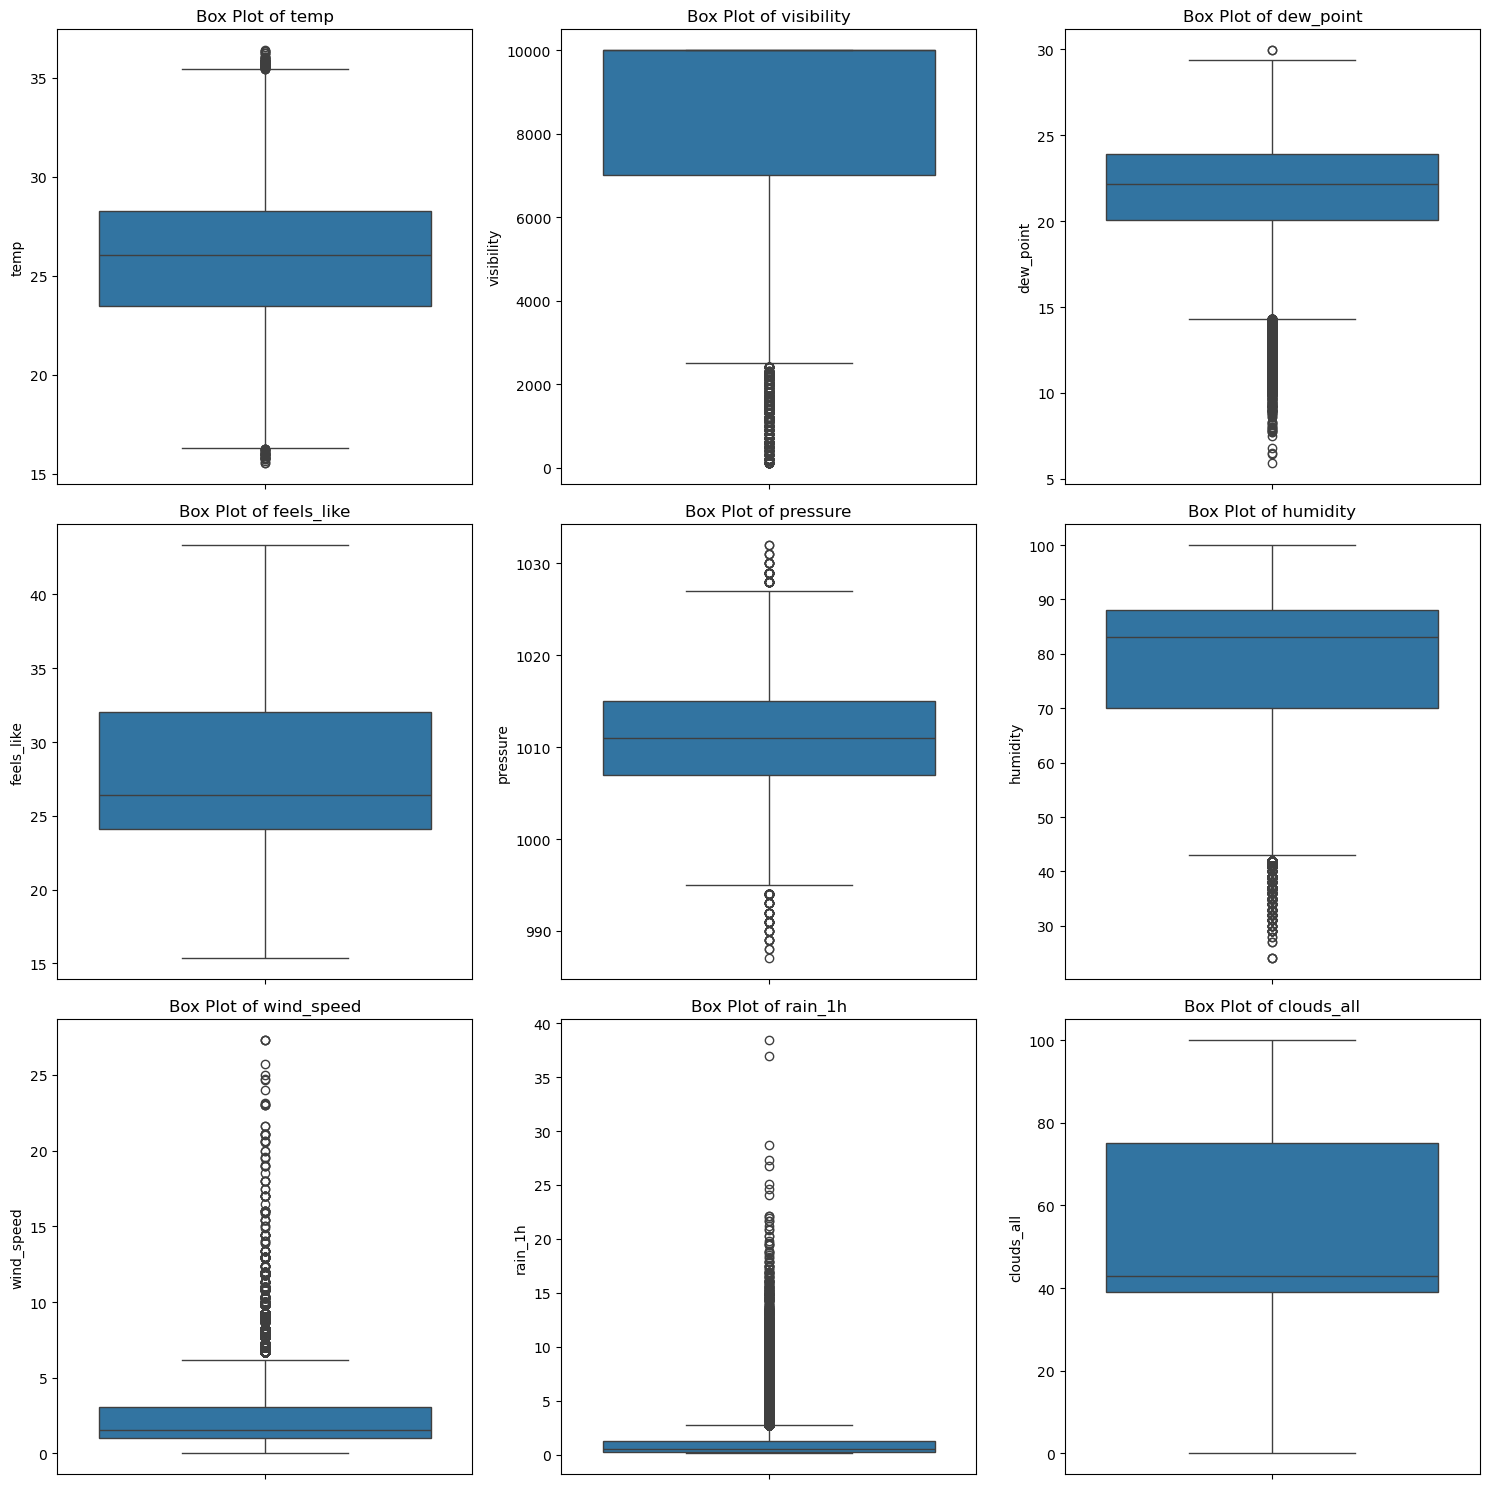

In [43]:
# Creating box plots for each continuous feature to show the spread and detect outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=weather_data, y=feature, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Box Plot of {feature}')

fig.tight_layout()
plt.show()
